In [2]:
#Imports - not all were used
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
from sklearn.metrics import confusion_matrix
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D 
#dataset of differentially expressed circRNAs is hepatocellular carcinoma - filtered in Strong Correlation code
methyl = pd.read_csv("/Users/kbhaskar/Desktop/ALL-DESKTOP-ITEMS-2022/BinaryClassificationDataFinal.csv")
methyl.head()





,Unnamed: 0,state,cg00131081,cg02754929,cg05927173,cg09277575,cg09639094,cg10683793,cg11467680,cg26142604,cg26380756,cg26665209
0,GSM4299203,1,0.512482,0.545598,0.134877,0.728473,0.155251,0.127684,0.807769,0.841442,0.053480,0.926206
1,GSM4299204,1,0.519339,0.543103,0.130753,0.748660,0.142913,0.111527,0.814765,0.853772,0.063529,0.924064
2,GSM4299205,0,0.651893,0.461054,0.139808,0.768702,0.139966,0.126769,0.827576,0.857551,0.062197,0.930667
3,GSM4299208,1,0.497859,0.564870,0.111966,0.741811,0.146469,0.096577,0.851733,0.869141,0.057925,0.932986
4,GSM4299209,0,0.576346,0.601313,0.108888,0.679264,0.131902,0.118812,0.824253,0.851976,0.055538,0.936020


In [3]:
methyl = methyl.iloc[: , 1:]
methyl.head()

,state,cg00131081,cg02754929,cg05927173,cg09277575,cg09639094,cg10683793,cg11467680,cg26142604,cg26380756,cg26665209
0,1,0.512482,0.545598,0.134877,0.728473,0.155251,0.127684,0.807769,0.841442,0.053480,0.926206
1,1,0.519339,0.543103,0.130753,0.748660,0.142913,0.111527,0.814765,0.853772,0.063529,0.924064
2,0,0.651893,0.461054,0.139808,0.768702,0.139966,0.126769,0.827576,0.857551,0.062197,0.930667
3,1,0.497859,0.564870,0.111966,0.741811,0.146469,0.096577,0.851733,0.869141,0.057925,0.932986
4,0,0.576346,0.601313,0.108888,0.679264,0.131902,0.118812,0.824253,0.851976,0.055538,0.936020


In [4]:
from sklearn.utils import shuffle
# shuffle to prevent bias
methyl = shuffle(methyl, random_state=420)
methyl= methyl.reset_index()
methyl = methyl.drop(columns=['index'])

In [5]:
methyl.head(20)

,state,cg00131081,cg02754929,cg05927173,cg09277575,cg09639094,cg10683793,cg11467680,cg26142604,cg26380756,cg26665209
0,0,0.551286,0.750998,0.135834,0.737339,0.136119,0.111167,0.803841,0.859010,0.053597,0.924288
1,1,0.536589,0.712103,0.111669,0.712777,0.151391,0.113463,0.824924,0.855209,0.058743,0.925775
2,1,0.494253,0.741179,0.130416,0.742893,0.159534,0.110607,0.814463,0.861940,0.060547,0.932012
3,1,0.638853,0.720501,0.112520,0.714961,0.146961,0.108323,0.808552,0.870939,0.053936,0.924906
4,1,0.596857,0.721786,0.130062,0.715126,0.157941,0.111693,0.819120,0.884881,0.052992,0.917946
5,0,0.486421,0.424482,0.103696,0.728414,0.183749,0.103270,0.824222,0.856570,0.059749,0.931062
6,1,0.615929,0.634880,0.131051,0.665749,0.171787,0.104027,0.825391,0.867300,0.053593,0.925757
7,0,0.421580,0.522082,0.111520,0.715380,0.185982,0.125027,0.832000,0.900664,0.057453,0.911989
8,0,0.533794,0.718443,0.123686,0.690336,0.154784,0.105916,0.803809,0.858781,0.075625,0.941765
9,0,0.591439,0.577997,0.120188,0.761360,0.142327,0.101530,0.861712,0.866849,0.051292,0.931970


In [5]:
#create a dict to keep track of the accuracy of each model
accuracies = {}
X = methyl.values
y = methyl['state'].values
X = np.delete(X,0,axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)
scoreList = []
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 30)  
knn.fit(x_train, y_train)

print("{} NN Score: {:.2f}%".format(10, knn.score(x_test, y_test)*100))
knn_predictions = knn.predict(x_test)
scoreList.append(knn.score(x_test, y_test))
acc = max(scoreList)*100
confusion_matrix(y_test, knn_predictions)
#bad accuracy so we do hyperparamter tuning

10 NN Score: 46.67%


array([[13,  4,  1],
       [ 8, 14,  2],
       [ 7, 10,  1]])

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.46      0.72      0.57        18
           1       0.50      0.58      0.54        24
           2       0.25      0.06      0.09        18

    accuracy                           0.47        60
   macro avg       0.40      0.45      0.40        60
weighted avg       0.41      0.47      0.41        60



In [7]:
knn_predictions


array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1,
       0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [194]:
#when hyperparamter tuning, we will use either grid search cv or randomized search cv depending on convenience/efficiency 
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 28


In [195]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 28, leaf_size = 1, p =1)  
knn.fit(x_train, y_train)

print("{} NN Score: {:.2f}%".format(28, knn.score(x_test, y_test)*100))
knn_predictions = knn.predict(x_test)
scoreList.append(knn.score(x_test, y_test))
acc = max(scoreList)*100
accuracies['KNN'] = acc
confusion_matrix(y_test, knn_predictions)
#better but still bad - cross validation should be able to improve it

28 NN Score: 78.95%


array([[15,  2],
       [ 6, 15]])

In [196]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        17
           1       0.88      0.71      0.79        21

    accuracy                           0.79        38
   macro avg       0.80      0.80      0.79        38
weighted avg       0.81      0.79      0.79        38



In [198]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 2)
rf.fit(x_train, y_train)

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))
rf_predictions = rf.predict(x_test)
confusion_matrix(y_test, rf_predictions)


Random Forest Algorithm Accuracy Score : 78.95%


array([[14,  3],
       [ 2, 19]])

In [199]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.86      0.90      0.88        21

    accuracy                           0.87        38
   macro avg       0.87      0.86      0.87        38
weighted avg       0.87      0.87      0.87        38



In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [202]:
rf3 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf3, param_distributions = random_grid, n_iter = 500, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [203]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [204]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1600, min_samples_split = 10, min_samples_leaf = 1, max_features = 'sqrt', max_depth = None, bootstrap = True, random_state = 521)
rf.fit(x_train, y_train)
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))
rf_predictions = rf.predict(x_test)
confusion_matrix(y_test, rf_predictions)
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc


Random Forest Algorithm Accuracy Score : 84.21%


In [205]:
#desicion tree 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 3)
dtc.fit(x_train, y_train)
acc = dtc.score(x_test, y_test)*100
print("Decision Tree Test Accuracy {:.2f}|%".format(acc))
dtc_predictions = dtc.predict(x_test)
confusion_matrix(y_test, dtc_predictions)

Decision Tree Test Accuracy 68.42|%


array([[12,  5],
       [ 7, 14]])

In [206]:
print(classification_report(y_test, dtc_predictions))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.74      0.67      0.70        21

    accuracy                           0.68        38
   macro avg       0.68      0.69      0.68        38
weighted avg       0.69      0.68      0.69        38



In [207]:
dtc = DecisionTreeClassifier()
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X,y);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [208]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000617,0.000046,0.000225,0.000021,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.650794,0.571429,0.666667,0.629630,0.041661,16
1,0.000581,0.000077,0.000211,0.000016,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.619048,0.634921,0.666667,0.640212,0.019797,15
2,0.000620,0.000050,0.000274,0.000045,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.603175,0.555556,0.650794,0.603175,0.038881,20
3,0.000542,0.000092,0.000261,0.000041,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.650794,0.492063,0.650794,0.597884,0.074826,23
4,0.000330,0.000012,0.000203,0.000018,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.507937,0.507937,0.507937,0.507937,0.000000,41


In [209]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [210]:
grid_search.best_score_

0.7142857142857143

In [211]:
dtc2 = DecisionTreeClassifier(criterion='gini',max_depth = 5, min_samples_leaf=5)
dtc2.fit(x_train, y_train)
acc = dtc2.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}|%".format(acc))
dtc2_predictions = dtc2.predict(x_test)
confusion_matrix(y_test, dtc2_predictions)


Decision Tree Test Accuracy 78.95|%


array([[14,  3],
       [ 5, 16]])

In [212]:
#support vector machine
from sklearn.svm import SVC
svm = SVC(random_state = 4)
svm=SVC(probability=True)

svm.fit(x_train, y_train)
acc = svm.score(x_test,y_test)*100
svm_predictions = svm.predict(x_test)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))
confusion_matrix(y_test, svm_predictions)

Test Accuracy of SVM Algorithm: 78.95%


array([[14,  3],
       [ 5, 16]])

In [213]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.84      0.76      0.80        21

    accuracy                           0.79        38
   macro avg       0.79      0.79      0.79        38
weighted avg       0.80      0.79      0.79        38



In [225]:
# defining parameter range
from sklearn.svm import SVC
svm = SVC()
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
 
grid2 = GridSearchCV(svm, param_grid,cv=4, refit = True, verbose = 3)
 
# fitting the model for grid search
grid2.fit(x_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV 1/4] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/4] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/4] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/4] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/4] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 2/4] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 3/4] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 4/4] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 1/4] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 2/4] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 3/4] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 4/4] END .................C=0.1, gamma=1, k

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [226]:
grid2.best_estimator_

SVC(C=100, gamma=0.1)

In [227]:
grid2.best_score_

0.8079658605974396

In [228]:
from sklearn.svm import SVC
svm = SVC(C=100, gamma = 1, kernel = 'rbf',probability=True)


svm.fit(x_train, y_train)
acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
svm_predictions = svm.predict(x_test)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))
confusion_matrix(y_test, svm_predictions)

Test Accuracy of SVM Algorithm: 81.58%


array([[14,  3],
       [ 4, 17]])

In [229]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
nb_predictions = nb.predict(x_test)
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))
confusion_matrix(y_test, nb_predictions)
#no hyper paramter tuning for naive bayes

Accuracy of Naive Bayes: 78.95%


array([[12,  5],
       [ 3, 18]])

In [230]:
print(classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.78      0.86      0.82        21

    accuracy                           0.79        38
   macro avg       0.79      0.78      0.78        38
weighted avg       0.79      0.79      0.79        38



In [232]:
#gradient boost
from sklearn import ensemble
gb = ensemble.GradientBoostingClassifier()
gb.fit(x_train, y_train)
acc = gb.score(x_test,y_test)*100
gb_predictions = gb.predict(x_test)
print("Accuracy of Gradient Boosting: {:.2f}%".format(acc))
confusion_matrix(y_test, gb_predictions)

Accuracy of Gradient Boosting: 84.21%


array([[15,  2],
       [ 4, 17]])

In [233]:
print(classification_report(y_test, gb_predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.89      0.81      0.85        21

    accuracy                           0.84        38
   macro avg       0.84      0.85      0.84        38
weighted avg       0.85      0.84      0.84        38



In [251]:
gbc = ensemble.GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
gridGB = GridSearchCV(gbc, param_grid = parameters,cv=6, refit = True, verbose = 3)
gridGB.fit(x_train, y_train)

Fitting 6 folds for each of 100 candidates, totalling 600 fits
[CV 1/6] END learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV 2/6] END learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV 3/6] END learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV 4/6] END learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV 5/6] END learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV 6/6] END learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV 1/6] END learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.0s
[CV 2/6] END learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.0s
[CV 3/6] END learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.0s
[CV 4/6] END learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.0s
[CV 5/6] END learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.0s
[CV 6/6] END learning_rate=0.01, max_dept

GridSearchCV(cv=6, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]},
             verbose=3)

In [252]:
gridGB.best_estimator_

GradientBoostingClassifier(learning_rate=1, n_estimators=250)

In [256]:
gb = ensemble.GradientBoostingClassifier(learning_rate=1, n_estimators=250)
gb.fit(x_train, y_train)
acc = gb.score(x_test,y_test)*100
accuracies['Gradient Boosting'] = acc
gb_predictions = gb.predict(x_test)
print("Accuracy of Gradient Boosting: {:.2f}%".format(acc))
confusion_matrix(y_test, gb_predictions)

Accuracy of Gradient Boosting: 89.47%


array([[16,  1],
       [ 3, 18]])

In [257]:
print(classification_report(y_test, gb_predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.95      0.86      0.90        21

    accuracy                           0.89        38
   macro avg       0.89      0.90      0.89        38
weighted avg       0.90      0.89      0.90        38



In [258]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)*100
lr_predictions = lr.predict(x_test)
print("Accuracy of Logistic Regression: {:.2f}%".format(acc))
confusion_matrix(y_test, lr_predictions)

Accuracy of Logistic Regression: 71.05%


array([[15,  2],
       [ 9, 12]])

In [259]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.62      0.88      0.73        17
           1       0.86      0.57      0.69        21

    accuracy                           0.71        38
   macro avg       0.74      0.73      0.71        38
weighted avg       0.75      0.71      0.71        38



In [277]:
lr = LogisticRegression()
param_gridLR = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
gridLR = GridSearchCV(lr, param_grid=param_gridLR,cv=4,verbose = 2, n_jobs =-1)
gridLR.fit(x_train, y_train)

Fitting 4 folds for each of 1600 candidates, totalling 6400 fits


/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.52311522 ...        nan 0.76778094 0.76120199]
  warnings.warn(
/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=2)

In [278]:
gridLR.best_estimator_

LogisticRegression(C=0.012742749857031334, penalty='none', solver='saga')

In [281]:
lr = LogisticRegression(C=0.012742749857031334, penalty='none', solver='saga')
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)*100
accuracies['Logistic Regression'] = acc
lr_predictions = lr.predict(x_test)
print("Accuracy of Logistic Regression: {:.2f}%".format(acc))
confusion_matrix(y_test, lr_predictions)

Accuracy of Logistic Regression: 81.58%


/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


array([[14,  3],
       [ 4, 17]])

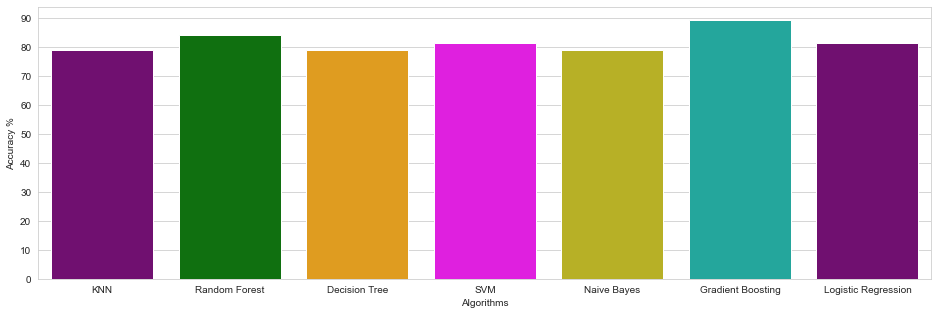

In [282]:
#graph accuracy of each model
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [301]:
print(accuracies
    )

{'KNN': 78.94736842105263, 'Random Forest': 84.21052631578947, 'Decision Tree': 78.94736842105263, 'SVM': 81.57894736842105, 'Naive Bayes': 78.94736842105263, 'Gradient Boosting': 89.47368421052632, 'Logistic Regression': 81.57894736842105}


In [283]:
#obtain probability for all classifiers
r_probs = [0 for _ in range (len(y_test))]
rf_probs = rf.predict_proba(x_test)
nb_probs = nb.predict_proba(x_test)
knn_probs = knn.predict_proba(x_test)
dtc_probs = knn.predict_proba(x_test)
svm_probs = svm.predict_proba(x_test)
gb_probs = gb.predict_proba(x_test)
lr_probs = lr.predict_proba(x_test)

In [284]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
svm_probs = svm_probs[:, 1]
gb_probs = gb_probs[:, 1]
lr_probs = lr_probs[:, 1]

In [285]:
from sklearn.metrics import roc_curve, roc_auc_score
#calculate AUC score
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
knn_auc = roc_auc_score(y_test,knn_probs)
dtc_auc = roc_auc_score(y_test,dtc_probs)
svm_auc = roc_auc_score(y_test,svm_probs)
gb_auc = roc_auc_score(y_test,gb_probs)
lr_auc = roc_auc_score(y_test,lr_probs)

In [286]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K nearest Neighbor: AUROC = %.3f' % (knn_auc))
print('Desicion Tree: AUROC = %.3f' % (dtc_auc))
print('Support Vector Machine: AUROC = %.3f' % (svm_auc))
print('Gradient Boosting: AUROC = %.3f' % (gb_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))


Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.964
Naive Bayes: AUROC = 0.877
K nearest Neighbor: AUROC = 0.866
Desicion Tree: AUROC = 0.866
Support Vector Machine: AUROC = 0.916
Gradient Boosting: AUROC = 0.894
Logistic Regression: AUROC = 0.857


In [287]:
#calculate true postive rate and false positive rate for classifiers
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

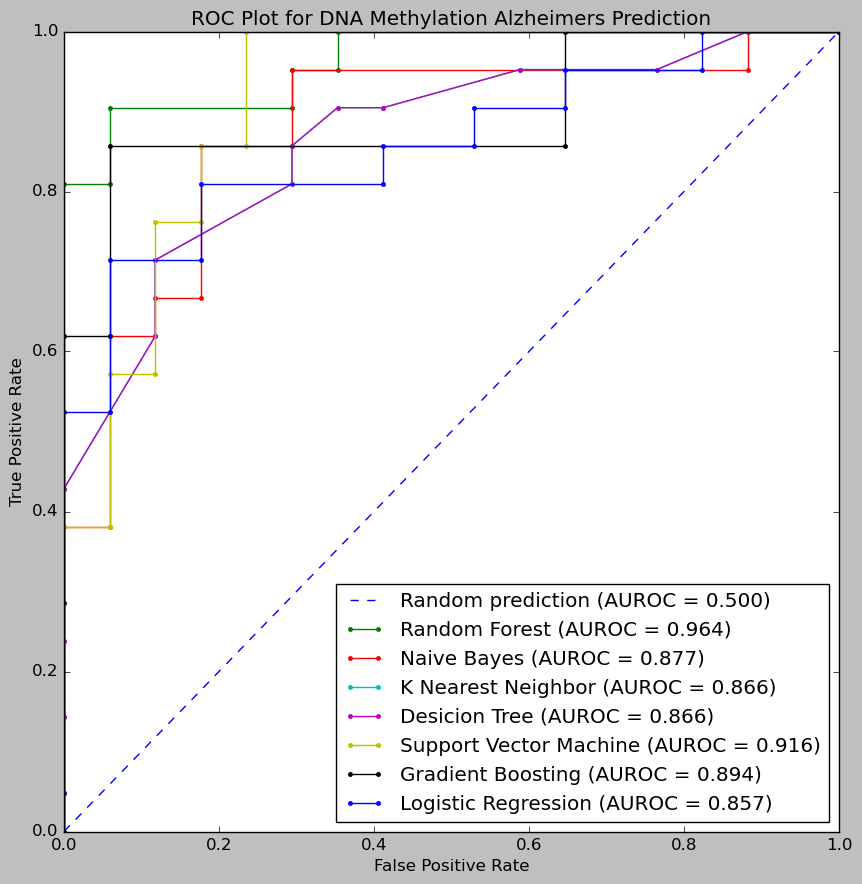

In [289]:
#plot
plt.style.use('classic')
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbor (AUROC = %0.3f)' % knn_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Desicion Tree (AUROC = %0.3f)' % dtc_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % svm_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
# Title
plt.title('ROC Plot for DNA Methylation Alzheimers Prediction')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc = 'lower right' ) 
# Show plot
plt.show()

In [290]:
#get confusion matrices for classifiers
cm_lr = confusion_matrix(y_test,lr_predictions)
cm_knn = confusion_matrix(y_test,knn_predictions)
cm_svm = confusion_matrix(y_test,svm_predictions)
cm_nb = confusion_matrix(y_test,nb_predictions)
cm_dtc = confusion_matrix(y_test,dtc_predictions)
cm_rf = confusion_matrix(y_test,rf_predictions)
cm_gb = confusion_matrix(y_test,gb_predictions)



In [1]:
#plot confusion matrices
plt.figure(figsize=(30,20))
plt.style.use('fivethirtyeight')
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,8)
plt.title("Gradient Boost Confusion Matrix")
sns.heatmap(cm_gb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()


NameError: name 'plt' is not defined

In [292]:
#cross validation using cross val score
mean_scores = []
#cross validation
from sklearn.model_selection import cross_val_score
from statistics import mean
svm_score=cross_val_score(svm, X, y, cv=5)
mean_scores.append(svm_score.mean())
print("%0.2f accuracy for svm with a standard deviation of %0.2f" % (svm_score.mean(), svm_score.std()))

knn_score=cross_val_score(knn, X, y, cv=5)
mean_scores.append(knn_score.mean())
print("%0.2f accuracy for knn with a standard deviation of %0.2f" % (knn_score.mean(), knn_score.std()))

rf_score=cross_val_score(rf, X, y, cv=5)
mean_scores.append(rf_score.mean())
print("%0.2f accuracy for random forest with a standard deviation of %0.2f" % (rf_score.mean(), rf_score.std()))

nb_score=cross_val_score(nb, X, y, cv=5)
mean_scores.append(nb_score.mean())
print("%0.2f accuracy for naive bayes with a standard deviation of %0.2f" % (nb_score.mean(), nb_score.std()))

dtc_score=cross_val_score(dtc, X, y, cv=5)
mean_scores.append(dtc_score.mean())
print("%0.2f accuracy for decision tree with a standard deviation of %0.2f" % (dtc_score.mean(), dtc_score.std()))


gb_score=cross_val_score(gb, X, y, cv=5)
mean_scores.append(gb_score.mean())
print("%0.2f accuracy for gradient boost with a standard deviation of %0.2f" % (gb_score.mean(), gb_score.std()))

lr_score=cross_val_score(lr, X, y, cv=5)
mean_scores.append(lr_score.mean())
print("%0.2f accuracy for logistic regression with a standard deviation of %0.2f" % (lr_score.mean(), lr_score.std()))



0.82 accuracy for svm with a standard deviation of 0.02
0.76 accuracy for knn with a standard deviation of 0.06
0.80 accuracy for random forest with a standard deviation of 0.05
0.80 accuracy for naive bayes with a standard deviation of 0.05
0.67 accuracy for decision tree with a standard deviation of 0.07
0.77 accuracy for gradient boost with a standard deviation of 0.06
0.79 accuracy for logistic regression with a standard deviation of 0.06


/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the 

/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the 

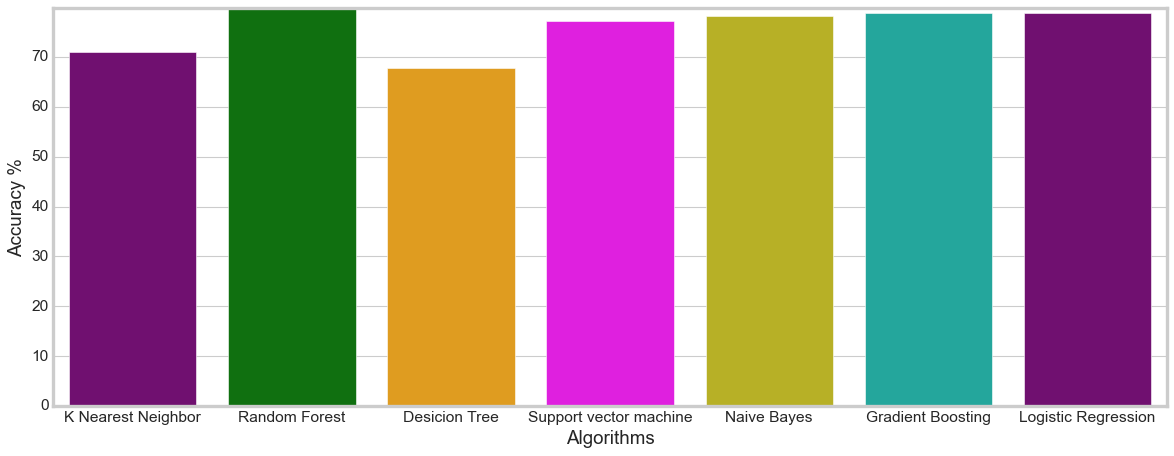

The accuracies are :
70.8994708994709 79.8941798941799 67.72486772486772 77.24867724867724 78.3068783068783 78.83597883597884 78.83597883597884


In [293]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
#stratified k-fold - splits test data into equal splits of 0s and 1s to prevent bias/overfitting
scores_svm =[]
scores_knn =[]
scores_rf =[]
scores_nb =[]
scores_dtc =[]
scores_gb =[]
scores_lr =[]
train1,test1,train2,test2 = 0,0,0,0
def getScore (model,train1,train2,test1,test2):
    model.fit(train1,train2)
    return model.score(test1,test2)
folds = StratifiedKFold(n_splits = 3)
for train_index, test_index in folds.split(X,y):
    train1,test1,train2,test2=X[train_index],X[test_index],y[train_index],y[test_index]
    scores_svm.append(getScore(svm,train1,train2,test1,test2))
    scores_knn.append(getScore(knn,train1,train2,test1,test2))
    scores_rf.append(getScore(rf,train1,train2,test1,test2))
    scores_nb.append(getScore(nb,train1,train2,test1,test2))
    scores_dtc.append(getScore(dtc,train1,train2,test1,test2))
    scores_gb.append(getScore(gb,train1,train2,test1,test2))
    scores_lr.append(getScore(lr,train1,train2,test1,test2))
svmScore = mean(scores_svm)*100
knnScore = mean(scores_knn)*100
rfScore = mean(scores_rf)*100
nbScore = mean(scores_nb)*100
dtcScore = mean(scores_dtc)*100
gbScore = mean(scores_gb)*100
lrScore = mean(scores_lr)*100
dic = {'K Nearest Neighbor':knnScore,'Random Forest' : rfScore, 'Desicion Tree' : dtcScore, 'Support vector machine' : svmScore, 'Naive Bayes' : nbScore,'Gradient Boosting' : gbScore, 'Logistic Regression' : lrScore}
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(dic.keys()), y=list(dic.values()), palette=colors)
plt.show()
print("The accuracies are :")
print(knnScore,rfScore, dtcScore, svmScore, nbScore, gbScore, lrScore)

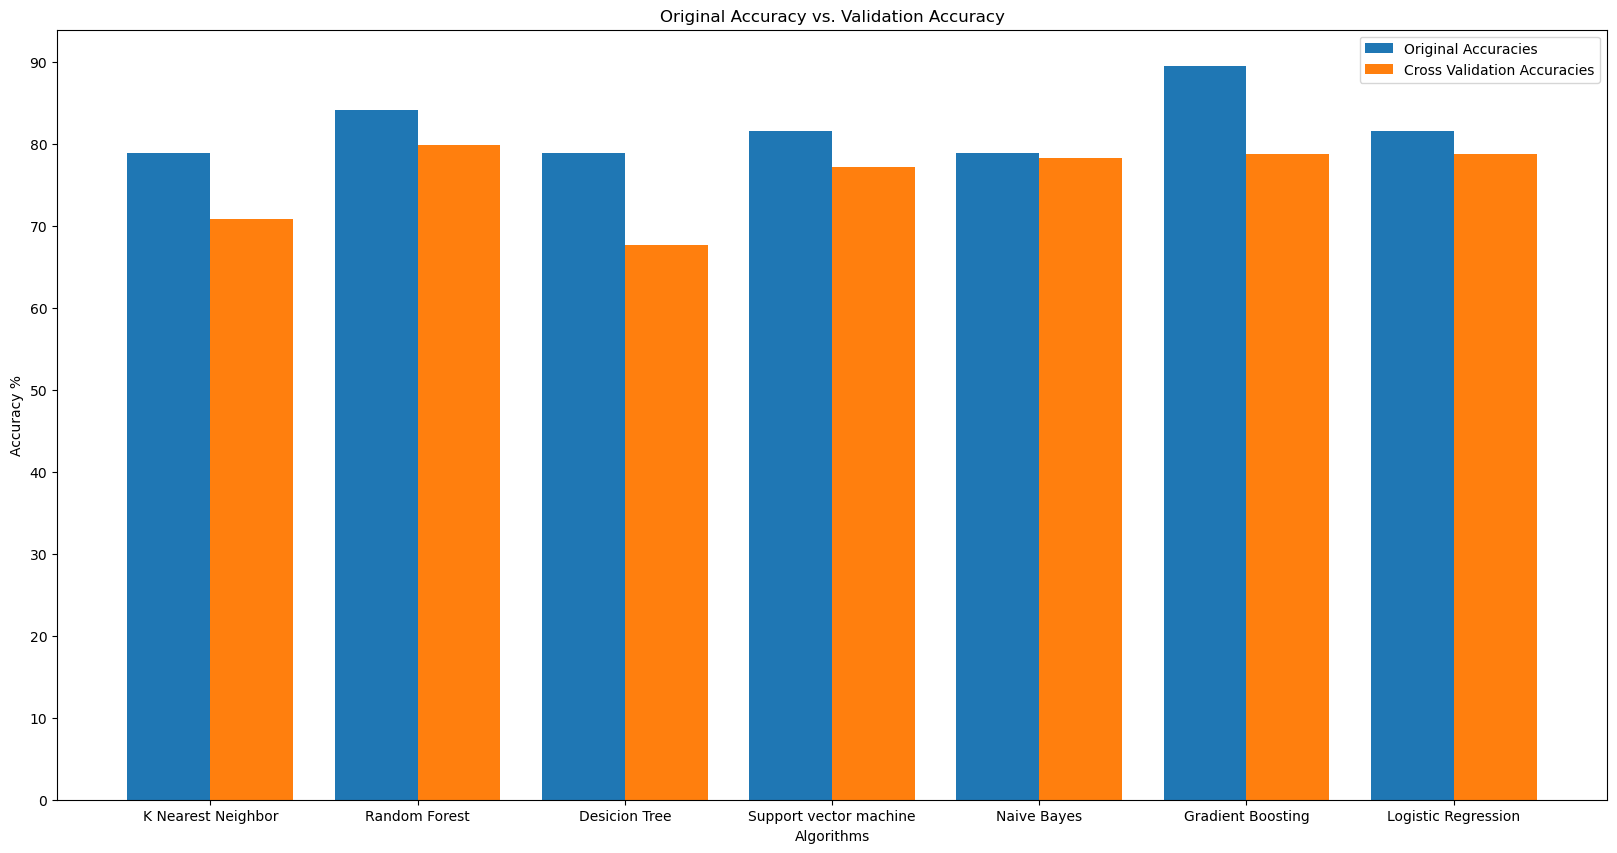

In [294]:
#plot change in accuracy
plt.style.use('default')
plt.figure(figsize=(20,10))
labels = list(dic.keys())
after = list(dic.values())
before = list(accuracies.values())

X_axis = np.arange(len(labels))
plt.bar(X_axis - 0.2, before, 0.4, label = 'Original Accuracies')
plt.bar(X_axis + 0.2, after, 0.4, label = 'Cross Validation Accuracies')
  
plt.xticks(X_axis, labels)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.title("Original Accuracy vs. Validation Accuracy")
plt.legend()
plt.yticks(np.arange(0,100,10))
plt.show()


In [295]:
#same process for AUROC, except use stratified k-fold data that has been split
r_probsCross = [0 for _ in range (len(test2))]
rf_probsCross = rf.predict_proba(test1)
nb_probsCross = nb.predict_proba(test1)
knn_probsCross = knn.predict_proba(test1)
dtc_probsCross = knn.predict_proba(test1)
svm_probsCross = svm.predict_proba(test1)
gb_probsCross = gb.predict_proba(test1)
lr_probsCross = lr.predict_proba(test1)

In [296]:
rf_probsCross = rf_probsCross[:, 1]
nb_probsCross = nb_probsCross[:, 1]
knn_probsCross = knn_probsCross[:, 1]
dtc_probsCross = dtc_probsCross[:, 1]
svm_probsCross = svm_probsCross[:, 1]
gb_probsCross = gb_probsCross[:, 1]
lr_probsCross = lr_probsCross[:, 1]

In [297]:
r_aucCross = roc_auc_score(test2, r_probsCross)
rf_aucCross = roc_auc_score(test2, rf_probsCross)
nb_aucCross = roc_auc_score(test2, nb_probsCross)
knn_aucCross = roc_auc_score(test2,knn_probsCross)
dtc_aucCross = roc_auc_score(test2,dtc_probsCross)
svm_aucCross = roc_auc_score(test2,svm_probsCross)
gb_aucCross = roc_auc_score(test2,gb_probsCross)
lr_aucCross = roc_auc_score(test2,lr_probsCross)

In [298]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_aucCross))
print('Random Forest: AUROC = %.3f' % (rf_aucCross))
print('Naive Bayes: AUROC = %.3f' % (nb_aucCross))
print('K nearest Neighbor: AUROC = %.3f' % (knn_aucCross))
print('Desicion Tree: AUROC = %.3f' % (dtc_aucCross))
print('Support Vector Machine: AUROC = %.3f' % (svm_aucCross))
print('Gradient Boosting: AUROC = %.3f' % (gb_aucCross))
print('Logistic Regression: AUROC = %.3f' % (lr_aucCross))


Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.879
Naive Bayes: AUROC = 0.890
K nearest Neighbor: AUROC = 0.854
Desicion Tree: AUROC = 0.854
Support Vector Machine: AUROC = 0.898
Gradient Boosting: AUROC = 0.881
Logistic Regression: AUROC = 0.897


In [299]:
r_fprCross, r_tprCross, _ = roc_curve(test2, r_probsCross)
rf_fprCross, rf_tprCross, _ = roc_curve(test2, rf_probsCross)
nb_fprCross, nb_tprCross, _ = roc_curve(test2, nb_probsCross)
knn_fprCross, knn_tprCross, _ = roc_curve(test2, knn_probsCross)
dtc_fprCross, dtc_tprCross, _ = roc_curve(test2, dtc_probsCross)
svm_fprCross, svm_tprCross, _ = roc_curve(test2, svm_probsCross)
gb_fprCross, gb_tprCross, _ = roc_curve(test2, gb_probsCross)
lr_fprCross, lr_tprCross, _ = roc_curve(test2, lr_probsCross)

In [2]:
plt.style.use('classic')
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(r_fprCross, r_tprCross, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_aucCross)
plt.plot(rf_fprCross, rf_tprCross, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_aucCross)
plt.plot(nb_fprCross, nb_tprCross, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_aucCross)
plt.plot(knn_fprCross, knn_tprCross, marker='.', label='K Nearest Neighbor (AUROC = %0.3f)' % knn_aucCross)
plt.plot(dtc_fprCross, dtc_tprCross, marker='.', label='Desicion Tree (AUROC = %0.3f)' % dtc_aucCross)
plt.plot(svm_fprCross, svm_tprCross, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % svm_aucCross)
plt.plot(gb_fprCross, gb_tprCross, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_aucCross)
plt.plot(lr_fprCross, lr_tprCross, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_aucCross)
# Title
plt.title('ROC Plot for DNA Methylation Alzheimers Prediction Cross Validation')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc = 'lower right' )
# Show plot
plt.show()

NameError: name 'plt' is not defined